# Setup

In [10]:
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2

root_path = Path("/home/olivieri/exp").resolve()
src_path = root_path / "src"
sys.path.append(f"{str(src_path)}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
from glob import glob
import os
import xarray as xr
import seaborn as sns

from prompter import *
from data import *

# Assessment

In [12]:
exp_path = Path("/home/olivieri/exp/my_data/by_model/LRASPP_MobileNet_V3/non-splitted/eval_prs/gemini-2.0-flash/baseline")

In [13]:
var_names = [os.path.splitext(os.path.basename(path))[0] for path in glob(f"{exp_path}/*.jsonl")]
var_names

['ConcatMasks_Ovr_Hz', 'SepMasks_Ovr']

In [14]:
data_da = compute_results_da(exp_path)

## Pred

In [16]:
display(describe_da(data_da.sel(metric="pred"), dims_to_agg=["img_idx"]))
display(describe_da(data_da.sel(metric="pred").mean("img_idx"), dims_to_agg=["var"]))

stat,mean,std,min,max
var,,,,
ConcatMasks_Ovr_Hz,0.701299,0.460690,0.0,1.0
SepMasks_Ovr,0.688312,0.466221,0.0,1.0


stat
mean    0.694805
std     0.009183
min     0.688312
max     0.701299
dtype: float64

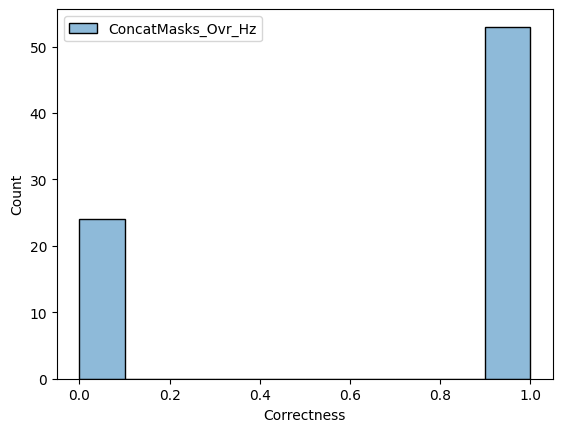

In [8]:
[sns.histplot(data_da.sel(metric="pred").loc[var_n], bins=10, alpha=0.5, label=var_n)
 for var_n in var_names]
plt.xlabel('Correctness')
plt.ylabel('Count')
plt.legend()

## Score

In [17]:
display(describe_da(data_da.sel(metric="score"), dims_to_agg=["img_idx"]))
display(describe_da(data_da.sel(metric="score").mean("img_idx"), dims_to_agg=["var"]))

stat,mean,std,min,max
var,,,,
ConcatMasks_Ovr_Hz,3.428571,1.390083,0.0,5.0
SepMasks_Ovr,3.662338,1.303945,0.0,5.0


stat
mean    3.545455
std     0.165298
min     3.428571
max     3.662338
dtype: float64